Читаем данные из файла:

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

%cd gdrive/MyDrive/

df=pd.read_csv("train.csv")

Mounted at /content/gdrive
/content/gdrive/MyDrive


Визуализация Survived:

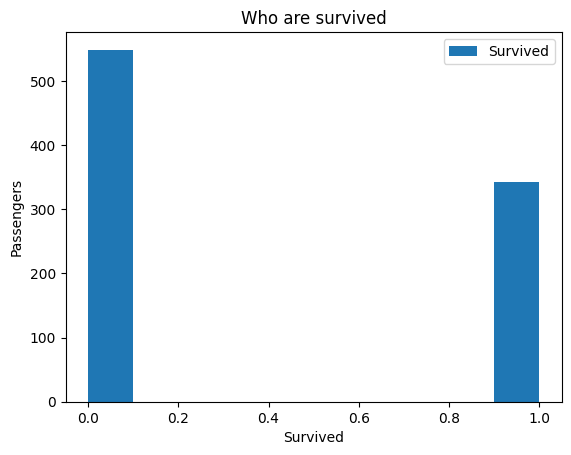

In [4]:
import matplotlib.pyplot as plt
s=df['Survived']

fig, ax=plt.subplots()
ax.title.set_text("Who are survived")
ax.set_xlabel("Survived")
ax.set_ylabel("Passengers")
ax.hist(s, label='Survived')
ax.legend()

Визуализация PClass:

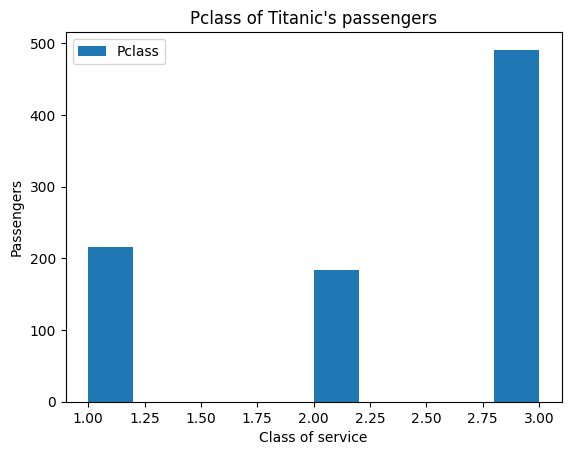

In [11]:
s=df['Pclass']
fig, ax=plt.subplots()
ax.title.set_text("Pclass of Titanic's passengers")
ax.set_xlabel("Class of service")
ax.set_ylabel("Passengers")
ax.hist(s, label='Pclass')
ax.legend()

Визуализация Age:

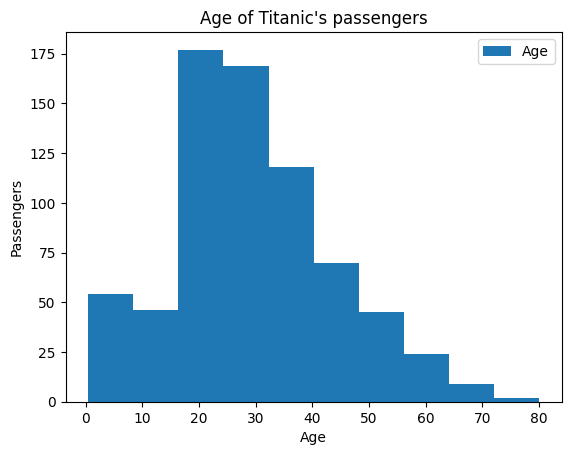

In [10]:
s=df['Age']
fig, ax=plt.subplots()
ax.title.set_text("Age of Titanic's passengers")
ax.set_xlabel("Age")
ax.set_ylabel("Passengers")
ax.hist(s, label='Age')
ax.legend()

Визуализация Sex:

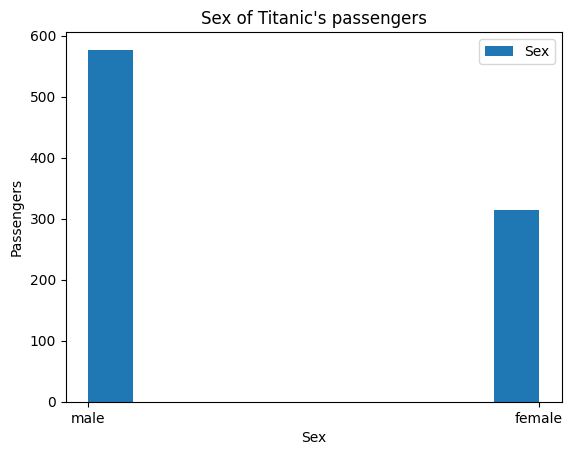

In [9]:
s=df['Sex']
fig, ax=plt.subplots()
ax.title.set_text("Sex of Titanic's passengers")
ax.set_xlabel("Sex")
ax.set_ylabel("Passengers")
ax.hist(s, label='Sex')
ax.legend()

Визуализация Parch:

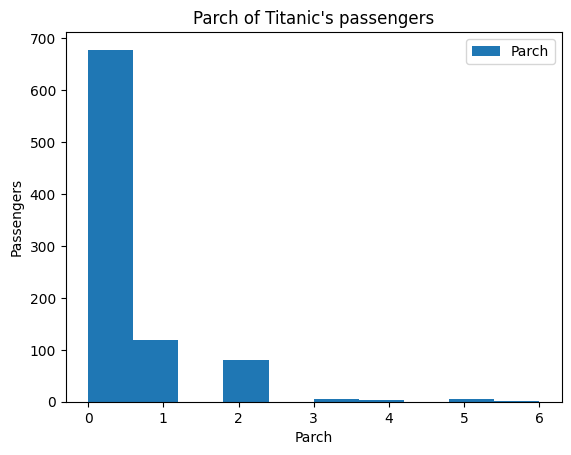

In [8]:
s=df['Parch']
fig, ax=plt.subplots()
ax.title.set_text("Parch of Titanic's passengers")
ax.set_xlabel("Parch")
ax.set_ylabel("Passengers")
ax.hist(s, label='Parch')
ax.legend()

Boxplot для столбца Age:

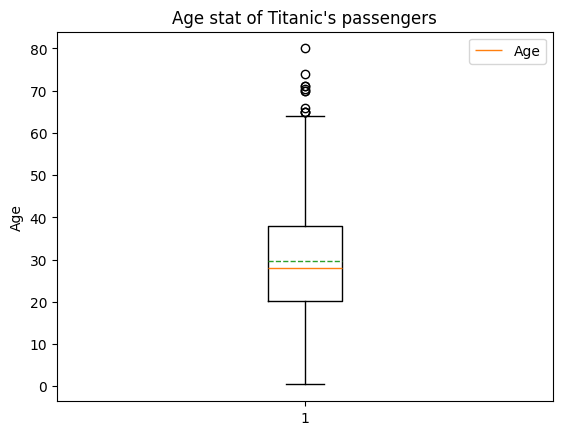

In [7]:
x=df['Age']
x=x.dropna()
fig, ax=plt.subplots()
ax.title.set_text("Age stat of Titanic's passengers")
ax.set_ylabel("Age")
ax.boxplot(x, showmeans=True, meanline=True,label='Age')
ax.legend()

Минимум - 0
Максимум - 66
Выбросы - 67,70,77,80
interquartile range: 20 -38

Pie chart для Survived:

([<matplotlib.patches.Wedge at 0x7fe8962a2d50>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Died'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

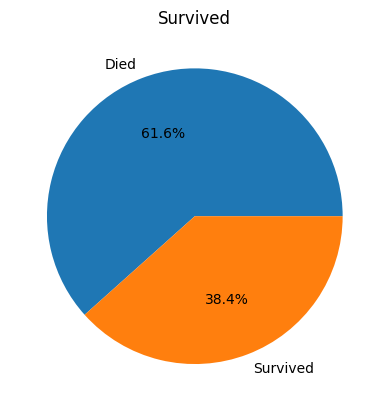

In [6]:
x=df['Survived'].value_counts()
labels=['Died','Survived']
fig, ax=plt.subplots()
ax.title.set_text("Survived")
ax.pie(x, labels=labels, autopct='%1.1f%%')

Pie chart для Pclass:

([<matplotlib.patches.Wedge at 0x7fe898db3490>,
 [Text(-0.17571616709359641, 1.0858746836637898, 'Class 3'),
  Text(-0.5160762002061153, -0.9714243951954356, 'Class 1'),
  Text(0.8765111456658484, -0.6646263698677192, 'Class 2')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.7%')])

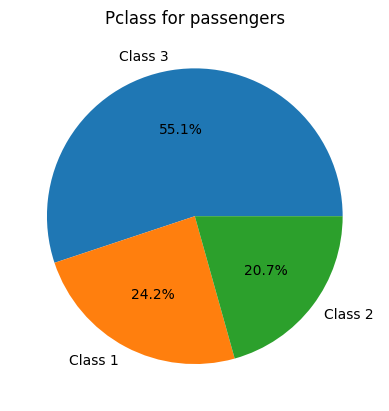

In [5]:
x=df['Pclass'].value_counts()
labels=['Class 3','Class 1','Class 2']
fig, ax=plt.subplots()
ax.title.set_text("Pclass for passengers")
ax.pie(x, labels=labels, autopct='%1.1f%%')

Pairplot для числовых данных:

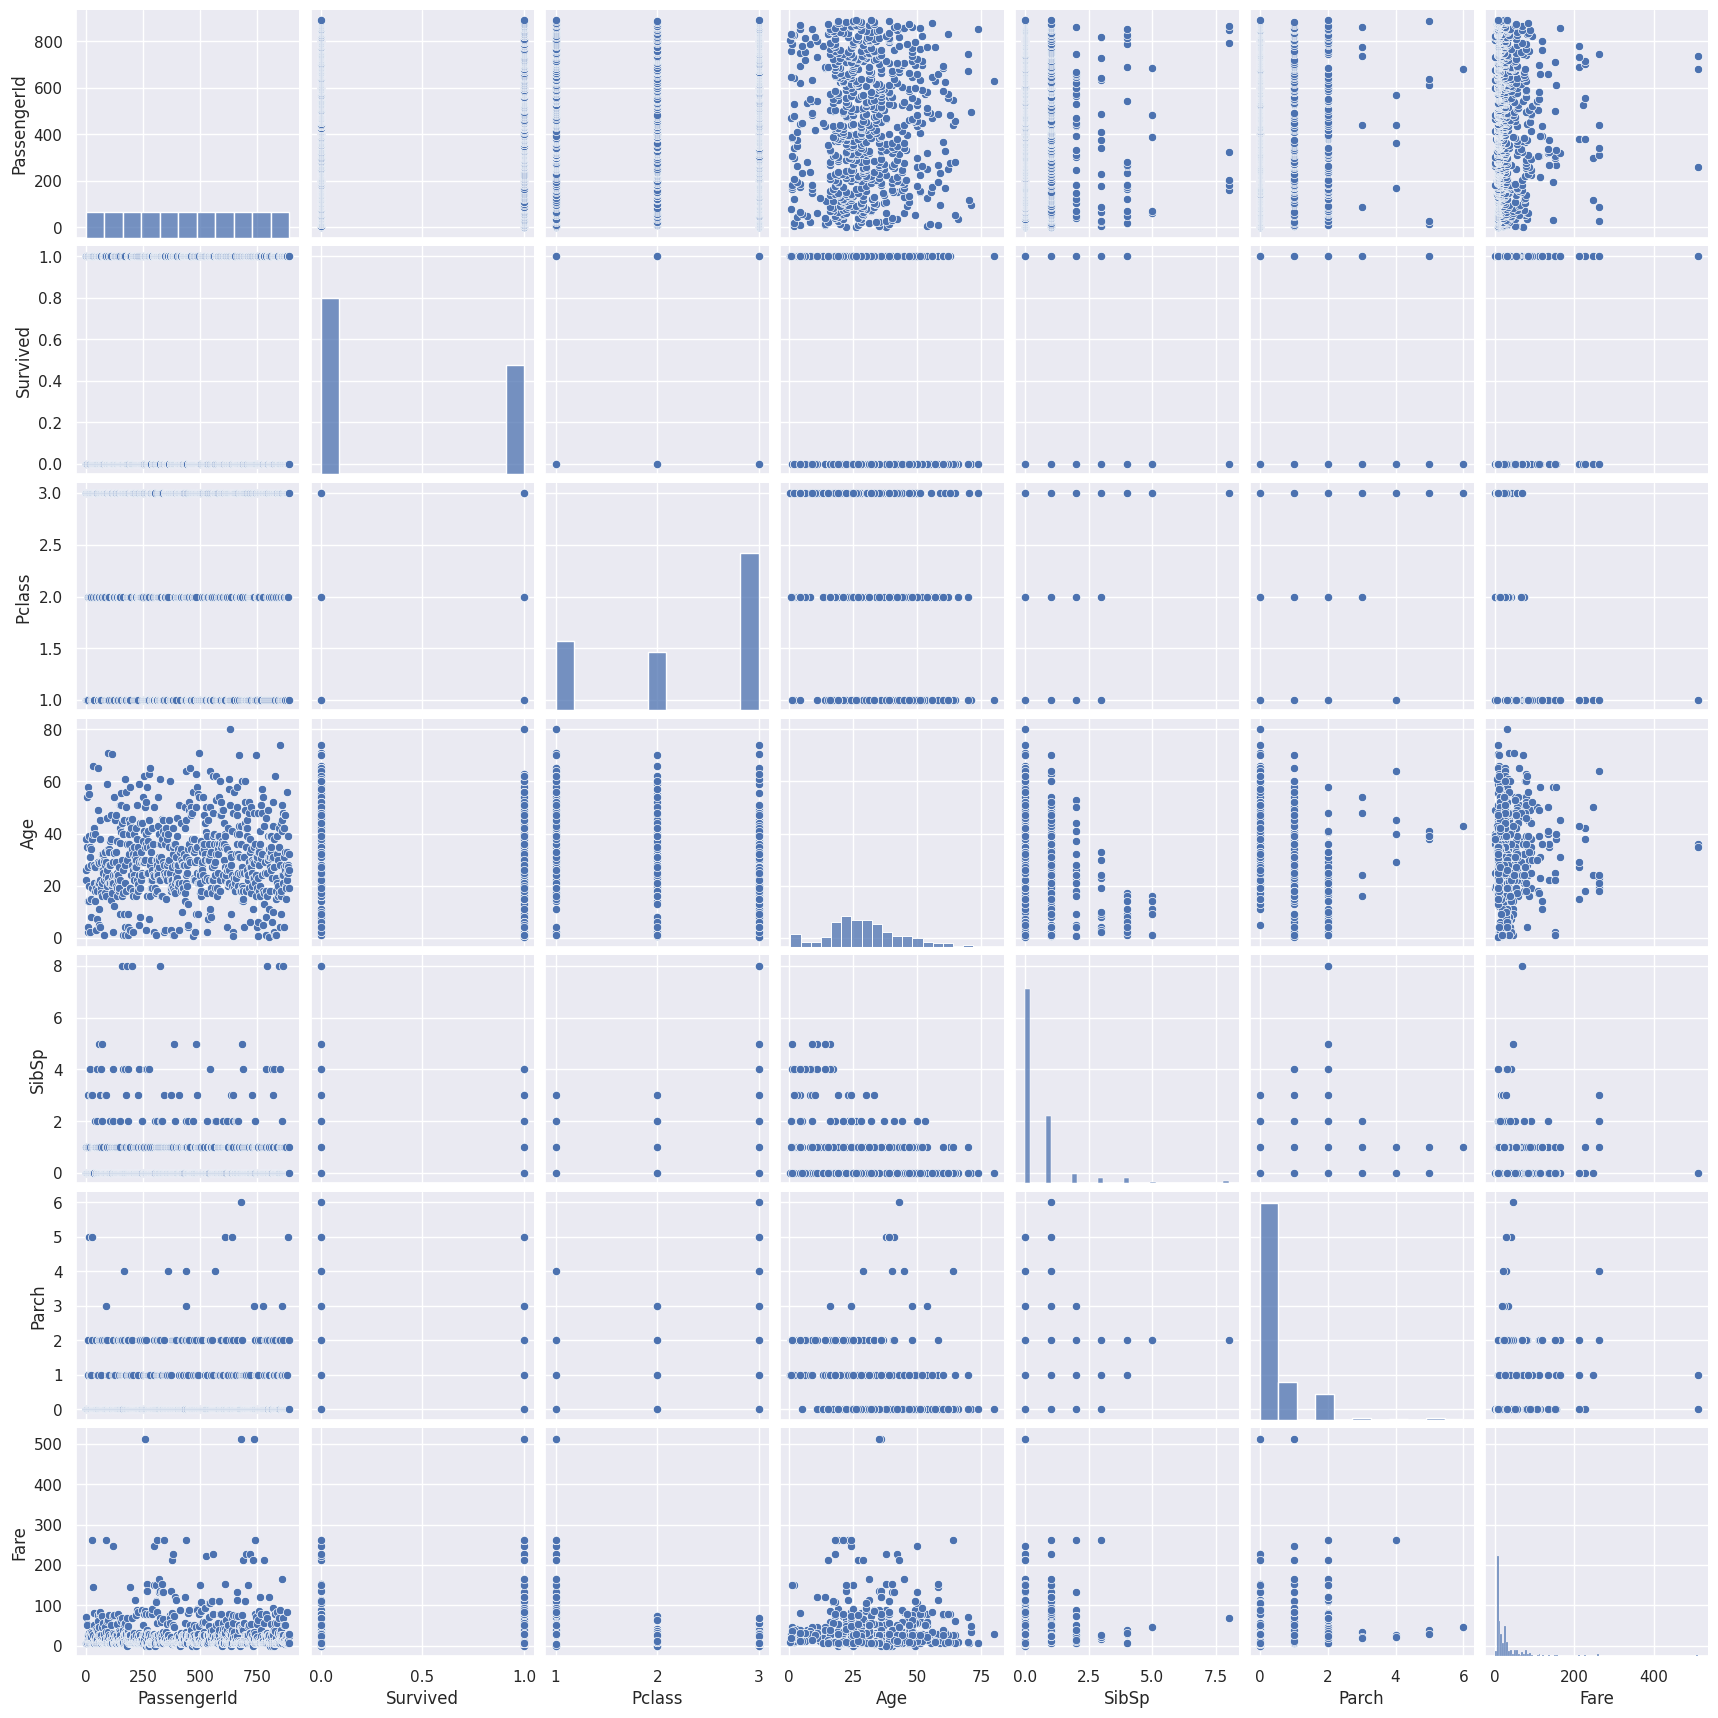

In [57]:
import seaborn as sbs
sbs.set(rc={'figure.figsize':(10,8)})
sbs.pairplot(df)

Sunburst plot:

In [68]:
import plotly.express as px
data=dict(
    categories=['Total','Pclass1','Pclass2','Pclass3',
                'Pclass1Men','Pclass1Woman',
                'Pclass2Men','Pclass2Woman',
                'Pclass3Men','Pclass3Woman'],
    parent=['','Total','Total','Total','Pclass1','Pclass1','Pclass2','Pclass2','Pclass3','Pclass3']
    )
v=df['Pclass'].value_counts()
name=df[(df['Sex']=='male') & (df['Pclass']==1)]
nm1=name['Pclass'].value_counts().iloc[0]
name=df[(df['Sex']=='female') & (df['Pclass']==1)]
nw1=name['Pclass'].value_counts().iloc[0]
name=df[(df['Sex']=='male') & (df['Pclass']==2)]
nm2=name['Pclass'].value_counts().iloc[0]
name=df[(df['Sex']=='female') & (df['Pclass']==2)]
nw2=name['Pclass'].value_counts().iloc[0]
name=df[(df['Sex']=='male') & (df['Pclass']==3)]
nm3=name['Pclass'].value_counts().iloc[0]
name=df[(df['Sex']=='female') & (df['Pclass']==3)]
nw3=name['Pclass'].value_counts().iloc[0]
v1=[]
v1.append(v.iloc[0]+v.iloc[1]+v.iloc[2])
v1.append(v.iloc[1])
v1.append(v.iloc[2])
v1.append(v.iloc[0])
v1.append(nm1)
v1.append(nw1)
v1.append(nm2)
v1.append(nw2)
v1.append(nm3)
v1.append(nw3)
data['value']=v1
fig=px.sunburst(data,names='categories',parents='parent',values='value', branchvalues='total')
fig.update_layout(title_text='Пассажиры Титаника по полу и классам обслуживания')
fig.show()